### Student Information
Name: 高靖雅/Riley Kao/Ching-Ya Kao 

Student ID: 109078501

GitHub ID: chinyakao

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [4]:
### Begin Assignment Here

### FIRST - take home exercises in the DM2021-Lab1-master Repo

In [5]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [6]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [7]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

### >>> Exercise 1 (5 min):  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [8]:
# Answer here
for t in range(3):
    print(twenty_train.data[t])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [9]:
import pandas as pd

# import helpers function
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category
X['category'] = twenty_train.target
# add category label to the dataframe
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [10]:
# Answer here
# I would like to know text and category name in every 10th from index 700 to 800
X.loc[700:800,('category_name','text')][::10]

,category_name,text
700,alt.atheism,From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...
710,sci.med,From: doyle+@pitt.edu (Howard R Doyle) Subject...
720,alt.atheism,From: darice@yoyo.cc.monash.edu.au (Fred Rice)...
730,alt.atheism,From: halat@pooh.bears (Jim Halat) Subject: Re...
740,alt.atheism,From: a137490@lehtori.cc.tut.fi (Aario Sami) S...
750,soc.religion.christian,From: maridai@comm.mot.com (Marida Ignacio) Su...
760,sci.med,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...
770,sci.med,From: harvey@oasys.dt.navy.mil (Betty Harvey) ...
780,comp.graphics,From: davidr@rincon.ema.rockwell.com (David J....
790,comp.graphics,From: kruzifix@netcom.com (Living On The Edge....


In [11]:
# Then, I would like to know whether these data are belongs to the category of "sci.med"
X.loc[700:800,('category_name','text')][::10]['category_name'] == 'sci.med'

700    False
710     True
720    False
730    False
740    False
750    False
760     True
770     True
780    False
790    False
800    False
Name: category_name, dtype: bool

### >>> Exercise 3 (5 min):
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [12]:
# Answer here
X[X['category_name'] == 'comp.graphics'][::10][0:4]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1,comp.graphics
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1,comp.graphics


### >>> Exercise 4 (5 min):
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [13]:
# Answer here

### >>> Exercise 5 (take home):
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [14]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [15]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer here**



### >>> Exercise 6 (take home):
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.



In [16]:
# Answer here
origin_X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
origin_X

,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4,From: stanly@grok11.columbiasc.ncr.com (stanly...
...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...


In [17]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


**Answer Here**

### >>> Exercise 7 (5 min):
Notice that for the ylim parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

X_sample = X.sample(n=1000)

soc.religion.christian    280
comp.graphics             253
sci.med                   244
alt.atheism               223
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

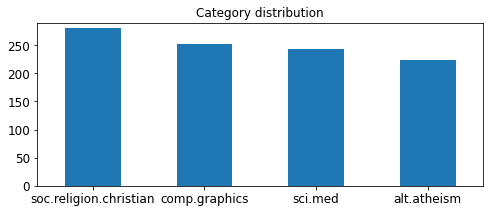

In [19]:
# Answer here
upper_bound = max(X_sample.category_name.value_counts()) + 10
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind= 'bar', title = 'Category distribution', ylim = [0, upper_bound], rot = 0, fontsize = 12, figsize = (8,3))

### >>> Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

![alt txt](https://i.imgur.com/9eO431H.png)

<AxesSubplot:title={'center':'Category distribution'}>

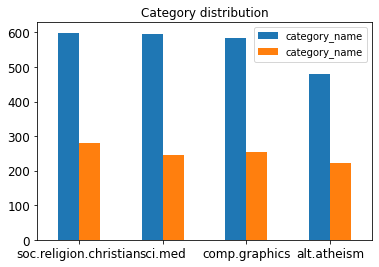

In [22]:
# Answer here
X_sample_counts = X_sample.category_name.value_counts()
X_counts = X.category_name.value_counts()
sample_df = pd.DataFrame(X_sample_counts).T
ori_df = pd.DataFrame(X_counts).T
all_df = ori_df.append(sample_df)
all_df.T.plot(kind= 'bar', title = 'Category distribution',  rot = 0, fontsize = 12, figsize = (6,4))

In [23]:
import nltk

In [24]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\small/nltk_data'
    - 'C:\\Users\\small\\anaconda3\\nltk_data'
    - 'C:\\Users\\small\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\small\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\small\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\small/nltk_data'
    - 'C:\\Users\\small\\anaconda3\\nltk_data'
    - 'C:\\Users\\small\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\small\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\small\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

### >>> Exercise 9 (5 min):
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [1]:
# Answer here
analyze(X.iloc[0]['text'])

NameError: name 'analyze' is not defined

### >>> Exercise 10 (take home):
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [32]:
# Answer here
fifth_record = X_counts[4, 0:100].toarray()
# find the index number of another 1
np.where(fifth_record == 1)

KeyError: 'key of type tuple not found and not a MultiIndex'

In [33]:
another_1_index = np.where(fifth_record == 1)[1][1]
count_vect.get_feature_names()[another_1_index]

NameError: name 'fifth_record' is not defined

### >>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [34]:
# Answer here

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [ ]:
# Answer here

In [37]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

IndexError: tuple index out of range

In [38]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

### >>> Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [39]:
# Answer here

### >>> Exercise 14 (take home):¶
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [40]:
# Answer here

### >>> Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [41]:
# Answer here

### >>> Exercise 16 (take home):
Try to generate the binarization using the category_name column instead. Does it work?

In [ ]:
# Answer here

---

### SECOND -  follow the same process from the DM2021-Lab1-master Repo on the new dataset. 

---

### THIRD - please attempt the following tasks on the new dataset.

---

### FOURTH - How can you improve the Data preprocessing for these specific datasets?

---

###### END of Lab1